In [1]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as sklearn_lr
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from logistic_regression import LogisticRegression

import time
import warnings
warnings.filterwarnings("ignore")

## performance comparison of my model and sklearn model

In [2]:
# FIRST DATASET
X, y = make_classification(
    n_samples=100, random_state=42, n_informative=20, n_features=20, n_redundant=0
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# my implementation
lr  = LogisticRegression(penalty='l2',C=1.0)
start = time.time()
lr.fit(X_train,y_train)
end = time.time()
print('first dataset')
print('train accuracy: ' + str(lr.score(X_train,y_train)) + ' test accuracy: '+ str(lr.score(X_test,y_test))+ ' time elapsed for training: ' + str(end - start))

# sklearn implementation
model = sklearn_lr(penalty='l2',C=1.0)
start = time.time()
model.fit(X_train,y_train)
end = time.time()
print('train accuracy: ' + str(model.score(X_train,y_train)) + ' test accuracy: '+ str(model.score(X_test,y_test))+ ' time elapsed for training: ' + str(end - start) + '\n')


# SECOND DATASET
X, y = make_classification(
    n_samples=1000,random_state=42,n_informative=20,n_redundant=10,n_features=35,n_repeated=5,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# my implementation
lr  = LogisticRegression(penalty='l2',C=1.0)
start = time.time()
lr.fit(X_train,y_train)
end = time.time()
print('second dataset')
print('train accuracy: ' + str(lr.score(X_train,y_train)) + ' test accuracy: '+ str(lr.score(X_test,y_test))+ ' time elapsed for training: ' + str(end - start))

# sklearn implementation
model = sklearn_lr(penalty='l2',C=1.0)
start = time.time()
model.fit(X_train,y_train)
end = time.time()
print('train accuracy: ' + str(model.score(X_train,y_train)) + ' test accuracy: '+ str(model.score(X_test,y_test))+ ' time elapsed for training: ' + str(end - start) + '\n')


# THIRD DATASET
X, y = make_classification(
    n_samples=10000, random_state=42, n_informative=2, n_repeated=5
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# my implementation
lr  = LogisticRegression(penalty='l2',C=1.0)
start = time.time()
lr.fit(X_train,y_train)
end = time.time()
print('third dataset')
print('train accuracy: ' + str(lr.score(X_train,y_train)) + ' test accuracy: '+ str(lr.score(X_test,y_test))+ ' time elapsed for training: ' + str(end - start))

# sklearn implementation
model = sklearn_lr(penalty='l2',C=1.0)
start = time.time()
model.fit(X_train,y_train)
end = time.time()
print('train accuracy: ' + str(model.score(X_train,y_train)) + ' test accuracy: '+ str(model.score(X_test,y_test))+ ' time elapsed for training: ' + str(end - start) + '\n')




first dataset
train accuracy: 0.9125 test accuracy: 0.6 time elapsed for training: 0.0769338607788086
train accuracy: 0.925 test accuracy: 0.6 time elapsed for training: 0.0044519901275634766

second dataset
train accuracy: 0.825 test accuracy: 0.805 time elapsed for training: 0.6100971698760986
train accuracy: 0.8225 test accuracy: 0.805 time elapsed for training: 0.012948036193847656

third dataset
train accuracy: 0.891125 test accuracy: 0.889 time elapsed for training: 2.6745119094848633
train accuracy: 0.89125 test accuracy: 0.8895 time elapsed for training: 0.010523796081542969



## effect of regularization on model weights

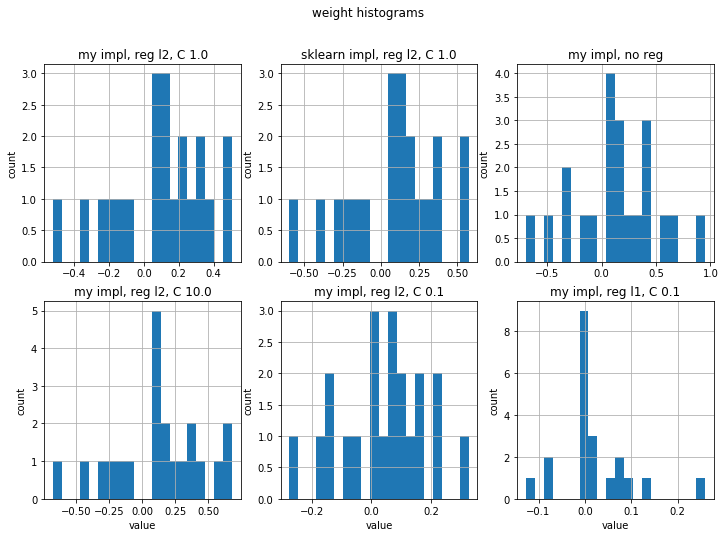

In [29]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2, 3,figsize=(12,8))
fig.suptitle('weight histograms')

X, y = make_classification(n_samples=100, random_state=42, n_informative=20, n_features=20, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# my implementation
lr  = LogisticRegression(penalty='l2',C=1.0)
lr.fit(X_train,y_train)
ax1.grid()
ax1.set_title('my impl, reg l2, C 1.0')
#ax1.set_xlabel('value')
ax1.set_ylabel('count')
_ = ax1.hist(lr.weights,bins=20)

# sklearn implementation
model = sklearn_lr(penalty='l2',C=1.0)
model.fit(X_train,y_train)
ax2.set_title('sklearn impl, reg l2, C 1.0')
#ax2.set_xlabel('value')
ax2.set_ylabel('count')
ax2.grid()
_ = ax2.hist(model.coef_.T,bins=20)

# no regularization
lr  = LogisticRegression(penalty='none')
lr.fit(X_train,y_train)
ax3.grid()
ax3.set_title('my impl, no reg')
#ax3.set_xlabel('value')
ax3.set_ylabel('count')
_ = ax3.hist(lr.weights,bins=20)

# low reg l2
lr  = LogisticRegression(penalty='l2',C=10.0)
lr.fit(X_train,y_train)
ax4.grid()
ax4.set_title('my impl, reg l2, C 10.0')
ax4.set_xlabel('value')
ax4.set_ylabel('count')
_ = ax4.hist(lr.weights,bins=20)

# high reg l2
lr  = LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train,y_train)
ax5.grid()
ax5.set_title('my impl, reg l2, C 0.1')
ax5.set_xlabel('value')
ax5.set_ylabel('count')
_ = ax5.hist(lr.weights,bins=20)

# strong reg l1
lr  = LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train,y_train)
ax6.grid()
ax6.set_title('my impl, reg l1, C 0.1')
ax6.set_xlabel('value')
ax6.set_ylabel('count')
_ = ax6.hist(lr.weights,bins=20)



## comparison of decision surfaces between my model and sklearn model

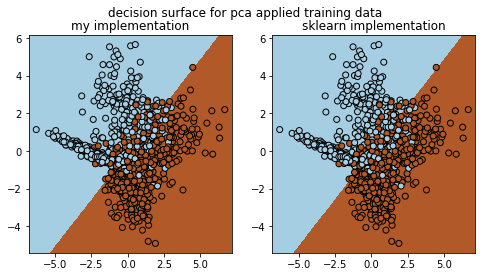

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8,4))
fig.suptitle('decision surface for pca applied training data')
ax1.set_title('my implementation')
ax2.set_title('sklearn implementation')

X,y = make_classification(n_samples=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca= PCA(n_components=2)

X_train = pca.fit_transform(X_train)

# my implementation
lr  = LogisticRegression(penalty='l2',C=1.0)
lr.fit(X_train,y_train)

# Plot the decision boundary. 
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax1.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)



# sklearn implementation
model = sklearn_lr(penalty='l2',C=1.0)
model.fit(X_train,y_train)

# Plot the decision boundary. 
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

